In [47]:
import pandas as pd

D_MAP_MAT = {
    "19Q4": "MAT20Q3",
    "20Q1": "MAT20Q3",
    "20Q2": "MAT20Q3",
    "20Q3": "MAT20Q3",
    "20Q4": "MAT21Q3",
    "21Q1": "MAT21Q3",
    "21Q2": "MAT21Q3",
    "21Q3": "MAT21Q3",
}

df = pd.read_excel("./普瑞快思-2021Q3.xlsx", engine="openpyxl", sheet_name="标准片数")
df["MAT"] = df["日期"].map(D_MAP_MAT)

In [57]:
import numpy as np
from data_class import Rx

source = "门诊"
unit = "标准片数"
dept = "老干科"
molecule = "RAAS平片"

mask = (df["原始诊断"]!="无诊断") & (df["统计项"]==unit) & (df["来源"]==source)
if molecule == "RAAS平片":
    mask = mask & (df["通用名"]!="沙库巴曲缬沙坦钠")
else:
    mask = mask & (df["通用名"]==molecule)
if dept is not None:
    mask = mask & (df["关注科室"]==dept)
    
df2 = df.loc[mask,:]
df2.rename({"日期":"季度"},axis="columns",inplace=True)

if dept is not None:
    title = f"{molecule} - {source}{dept} - {unit}"
else:
    title = f"{molecule} - {source} - {unit}"
    
r = Rx(df2, name=title)
r_pre = Rx(df2[df2["MAT"] == "MAT20Q3"], name=f"{title} - MAT20Q3")
r_post = Rx(df2[df2["MAT"] == "MAT21Q3"], name=f"{title} - MAT21Q3")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\venv37\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


In [37]:
# 整体表现
r.plot_total_bar(groupby="MAT")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\venv37\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


./plots/RAAS平片 - 门诊 - 标准片数 - 相关适应症贡献占比.png has been saved...


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels
c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


./plots/RAAS平片 - 门诊 - 标准片数 - 高血压合并症贡献占比.png has been saved...


In [ ]:
r_pre.plot_venn(["高血压", "血脂异常"])
r_post.plot_venn(["高血压", "血脂异常"])

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


[0.7160221801253744, 0.14039847838395844, 0.13408092080923648, 0.09906052146550767, 0.05802685169935298, 0.018249940668512307, 0.013266482016861092]
(0.5722012889773749, 0.036354498266799554, 0.08579403944864658, 0.07107061045823228, 0.04476036968249189, 0.004983458651651215, 0.013266482016861092) [0.7160221801253744, 0.14039847838395844, 0.13408092080923648]
['高血压', '糖尿病', '慢性肾病']


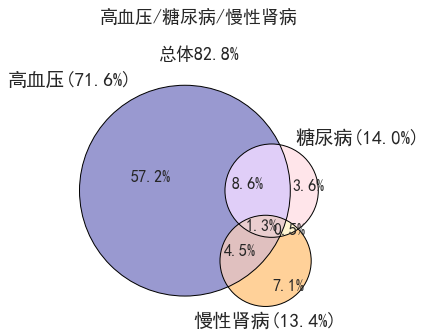

In [41]:
# Venn
# for como in ["血脂异常", "糖尿病", "慢性肾病", "卒中"]:
#     r_pre.plot_venn(["高血压","冠心病",  como])
#     r_post.plot_venn(["高血压","冠心病",  como])
r_post.plot_venn(["高血压","糖尿病","慢性肾病"])

In [38]:
# 适应症个数及top具体处方适应症
r.plot_como_len(groupby="MAT")
r.plot_intersect(groupby="MAT")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


./plots/RAAS平片 - 门诊 - 标准片数 - 相关适应症合并个数.png has been saved...
./plots/RAAS平片 - 门诊 - 标准片数 - 具体合并症组合贡献占比 - Top20.png has been saved...


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:185: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


[0.7319321452899429, 0.3186758453848479, 0.16367536928854465, 0.21971399691740714, 0.15005613750916874, 0.09687173337769922, 0.09411246754958986]
(0.4562744784129568, 0.09620258263933135, 0.12560152936781727, 0.010859965951266537, 0.055943669959578876, 0.0027592658281093557, 0.09411246754958986) [0.7319321452899429, 0.3186758453848479, 0.16367536928854465]
['高血压', '冠心病', '血脂异常']


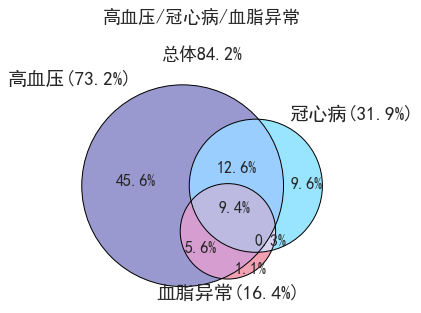

In [59]:
# 各种交叉结果
# r_post.plot_group_barh(groupby="关注科室")
# r.plot_group_barh(groupby="关注科室", diffby="MAT")
# r.plot_group_barh("季度")
# r_post.plot_group_barh(groupby="通用名")
# r.plot_group_barh(groupby="通用名", diffby="MAT")
r_post.plot_venn(["高血压", "冠心病","血脂异常"])
# r_post.plot_venn(["高血压", "慢性肾病"])


In [ ]:
mask = df2["通用名"] == '沙库巴曲缬沙坦钠'
df3 =  df2.loc[mask,:]
r_arni = Rx(df3, name="沙库巴曲标准片数")
r_arni.plot_barh("日期")

In [ ]:
mask = df3["日期"] == "21Q3"
df4 = df3.loc[mask,:]
r_arni_q3 = Rx(df4, name="沙库巴曲标准片数_21Q3")
r_arni_q3.plot_venn(["高血压", "冠心病", "心力衰竭"])

In [ ]:
r.plot_ca("通用名", len_set=2, labels_in=["高血压"])